<a href="https://colab.research.google.com/github/SergeiSa/Control-Theory-Slides-Spring-2022/blob/main/ColabNotebooks/StateSpace2ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[-10.77200187  -2.22799813]
[ 0.37812495 -7.27596935]
[[-24. -13.]]
(array([0.09810489, 0.03269944]), array([-0.09304505,  1.11851616]))


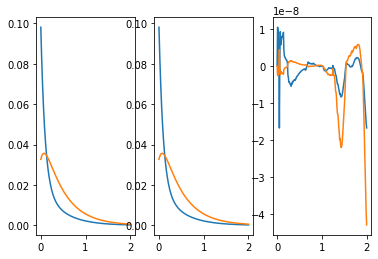

In [ ]:
import numpy as np
from numpy.linalg import pinv
from scipy.integrate import odeint
from matplotlib import pyplot as pp

# we work with a system dx/dt = A*x
A = np.array([[-10, 3], [2, -3]])
# l, _ = np.linalg.eig(A) 
# print( l )

w = np.random.randn(1, 2)

#map from x to y, dy/dt
T = np.concatenate((w, w @ A), axis=0)
l, _ = np.linalg.eig(T) #check eigenvalues to see if the matrix is degenerate
print(l)

# coefficients of the ODE to be found
b = w @ A @ A @ pinv(T)
print(b)

#collable functions for simulation with odeint
def mySS(x, t):
    return A @ x

def myODE(x, t):
    # y   = x[0]
    # dy  = x[1]
    # ddy = b1*y + b2*dy
    dx  = np.zeros((2, ))
    dx[0] = x[1]
    dx[1] = b @ x
    return dx

#initial conditions for simulation with odeint
x0_SS = np.random.randn(2, )
x0_ODE = T @ x0_SS
# print((x0_SS, x0_ODE))

#simulation
time = np.linspace(0, 2, num=200)
solution_1 = odeint(mySS,  x0_SS,  time)
solution_2 = odeint(myODE, x0_ODE, time)

#mapping back to the same coordinates
solution_2_mapped = pinv(T) @ solution_2.transpose()
solution_2_mapped = solution_2_mapped.transpose()

#plotting
fig, axs = pp.subplots(nrows=1, ncols=3)
axs[0].plot(time, solution_1)
axs[1].plot(time, solution_2_mapped)
axs[2].plot(time, solution_1 - solution_2_mapped)


[-3.92810937+2.2805071j -3.92810937-2.2805071j -2.54336951+0.j
 -1.76815324+0.j       ]
[-36.44816834   8.65893429   8.01861546  -0.19437355]
[[ -92.77789218 -124.27991553  -59.00008869  -12.16774149]]
(array([ 0.56296019,  0.13010345, -1.47539038, -0.71385999]), array([  -1.93269822,    2.2061749 ,   15.21707476, -144.6538674 ]))


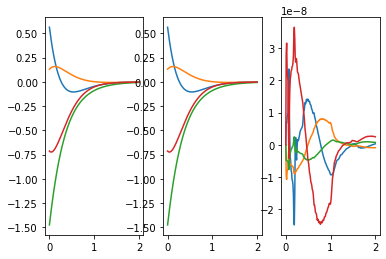

In [15]:
import numpy as np
from numpy.linalg import pinv
from scipy.integrate import odeint
from matplotlib import pyplot as pp

n = 4;
A = np.random.randn(n, n) - np.eye(n)*2
l, _ = np.linalg.eig(A) #checking the eigenvalues to see what behaviour we can expect
print( l )

w = np.random.randn(1, n)

#map from x to y, dy/dt, ...
T = np.zeros((n, n))
h = w
T[0, :] = h
for i in range(n-1):
    h = h @ A
    T[i+1, :] = h

# T = np.concatenate((w, w @ A, w @ A @ A), axis=0) #the n = 3 case
l, _ = np.linalg.eig(T)  #check eigenvalues to see if the matrix is degenerate
print(l)

# coefficients of the ODE to be found
b = h @ A @ pinv(T)
# b = w @ A @ A @ A @ pinv(T) #the n = 3 case
print(b)

#collable functions for simulation with odeint
def mySS(x, t):
    return A @ x

def myODE(x, t):
    dx  = np.zeros((n, ))

    for i in range(n-1):
        dx[i] = x[i+1]
    # dx[0] = x[1] #the n = 3 case
    # dx[1] = x[2] #the n = 3 case
    dx[n-1] = b @ x
    return dx

#initial conditions for simulation with odeint
x0_SS = np.random.randn(n, )
x0_ODE = T @ x0_SS
# print((x0_SS, x0_ODE))

#simulation
time = np.linspace(0, 2, num=200)
solution_1 = odeint(mySS,  x0_SS,  time)
solution_2 = odeint(myODE, x0_ODE, time)

#mapping back to the same coordinates
solution_2_mapped = pinv(T) @ solution_2.transpose()
solution_2_mapped = solution_2_mapped.transpose()

#plotting
fig, axs = pp.subplots(nrows=1, ncols=3)
axs[0].plot(time, solution_1)
axs[1].plot(time, solution_2_mapped)
axs[2].plot(time, solution_1 - solution_2_mapped)
